Bits a transportar [1 0 1 ... 0 1 1]


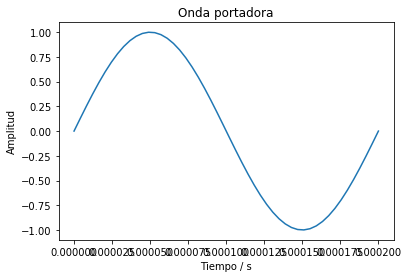

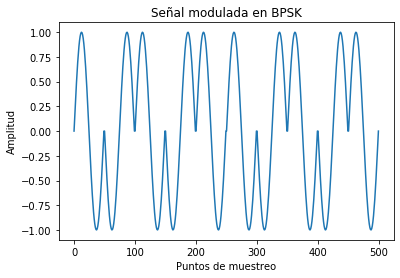

Potencia Instántanea: [0.         0.01635257 0.06434065 ... 0.         0.         0.        ] W

Potencia promedio: 0.48995197990395956 W

SNR: [-2 -1  0  1  2  3]

Potencia de ruido SNR: [0.7765215575826298, 0.6168129980599598, 0.48995197990395956, 0.3891826912967788, 0.3091388001630153, 0.2455576774182704]

Desviación estandar del ruido: [0.88120461 0.78537443 0.6999657  0.62384509 0.55600252 0.49553777]



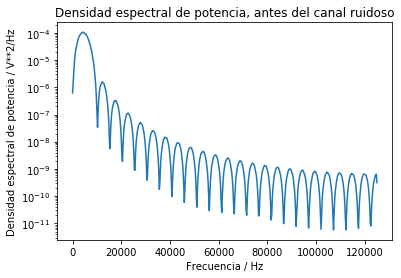

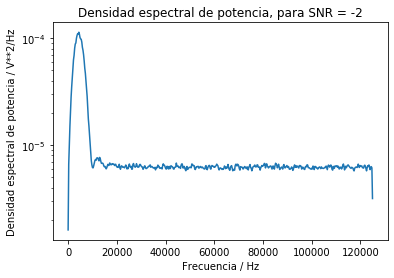

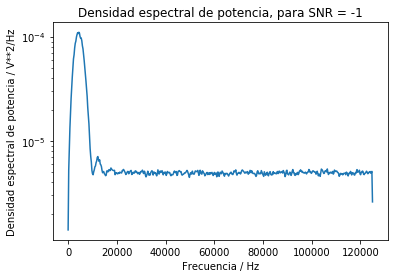

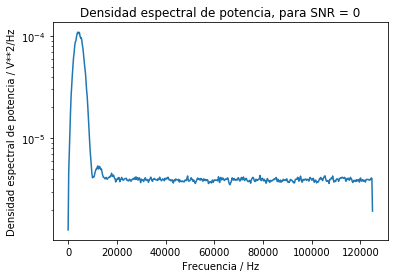

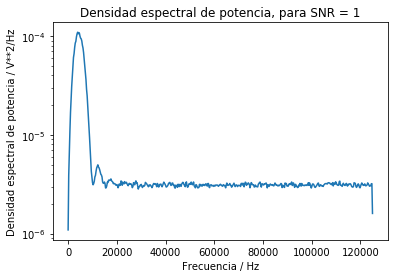

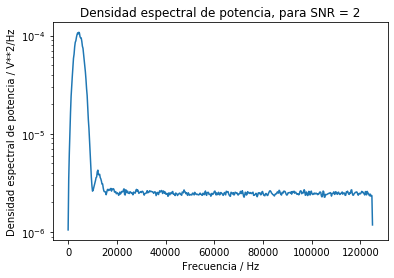

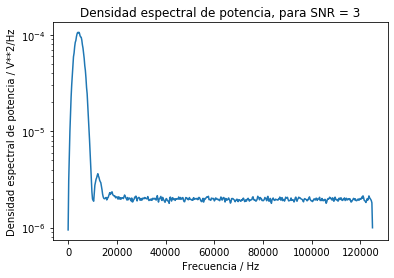

errores [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

BER [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]



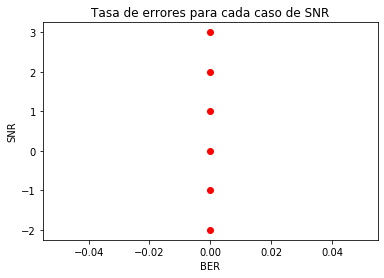

In [3]:
import numpy
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import signal
import pandas as pd

#Se ingresa la tabla de datos con los bits
datos = pd.read_csv('bits10k.csv')
df = pd.DataFrame(datos)

#Se incluyen los datos a un array de numpy
bits = df['0'].to_numpy()
print("Bits a transportar", bits)

# Número de bits
N = 10000

# Frecuencia de operación
f = 5000 # Hz

# Duración del período de cada símbolo (onda)
T = 1/f # 0.2 ms

# Número de puntos de muestreo por período
p = 50

# Puntos de muestreo para cada período
tp = np.linspace(0, T, p)

# Creación de la forma de onda de la portadora
sinus = np.sin(2*np.pi * f * tp)

# Visualización de la forma de onda de la portadora
plt.plot(tp, sinus)
plt.title("Onda portadora")
plt.ylabel('Amplitud')
plt.xlabel('Tiempo / s')
plt.show()

# Frecuencia de muestreo
fs = p/T # 250 kHz

# Creación de la línea temporal para toda la señal Tx
t = np.linspace(0, N*T, N*p)

# Inicializar el vector de la señal modulada Tx
senal = np.zeros(t.shape)

########## Creación de la señal modulada BPSK ###########
for k, b in enumerate(bits):
    if b == 1:
        senal[k*p:(k+1)*p] = sinus
    else:
        senal[k*p:(k+1)*p] = -sinus
        
        
# Visualización de los primeros 10 bits modulados
pb = 10
plt.figure()
plt.title('Señal modulada en BPSK')
plt.ylabel('Amplitud')
plt.xlabel('Puntos de muestreo')
plt.plot(senal[0:pb*p])
plt.savefig('Modulada_BPSK')
plt.show()

# Potencia instantánea (W)
Pinst = senal**2
print('Potencia Instántanea:', Pinst, 'W')
print()

# Potencia promedio a partir de la potencia instantánea (W)
Ps = integrate.trapz(Pinst, t) / (N * T)
print('Potencia promedio:', Ps, 'W')
print()

# Relación señal a ruido deseada (SNR) desde -2 hasta 3 dB.
SNR = np.arange(-2, 4)
print('SNR:', SNR)
print()

# Potencia del ruido para SNR y potencia de la señal dadas
Pn = [Ps / (10**(SNR[0] / 10)), Ps / (10**(SNR[1] / 10)), Ps / (10**(SNR[2] / 10)), Ps / (10**(SNR[3] / 10)),
        Ps / (10**(SNR[4] / 10)), Ps / (10**(SNR[5] / 10))]
print('Potencia de ruido SNR:', Pn)
print()

# Desviación estándar del ruido
sigma = np.sqrt(Pn)
print('Desviación estandar del ruido:', sigma)
print()

# Se crean 6 señales de ruido blanco (Pn = sigma^2)
for i in range(0,6):
    globals()['ruido{}'.format(i)] = np.random.normal(0, sigma[i], senal.shape)
    

# Se simulan 6 canales de señal recibida
for i in range(0,6):
    globals()['Rx{}'.format(i)] = senal + globals()['ruido{}'.format(i)]


############# Densidad espectral de potencia ############

# Antes del canal ruidoso
fw, PSD = signal.welch(senal, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.title('Densidad espectral de potencia, antes del canal ruidoso')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.savefig('DEP')
plt.show()

# Después del canal ruidoso para SNR = -2
fw, PSD = signal.welch(Rx0, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.title('Densidad espectral de potencia, para SNR = -2')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.savefig('DEP1')
plt.show()

# Después del canal ruidoso para SNR = -1
fw, PSD = signal.welch(Rx1, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.title('Densidad espectral de potencia, para SNR = -1')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.savefig('DEP2')
plt.show()

# Después del canal ruidoso para SNR = 0
fw, PSD = signal.welch(Rx2, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.title('Densidad espectral de potencia, para SNR = 0')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.savefig('DEP3')
plt.show()

# Después del canal ruidoso para SNR = 1
fw, PSD = signal.welch(Rx3, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.title('Densidad espectral de potencia, para SNR = 1')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.savefig('DEP4')
plt.show()

# Después del canal ruidoso para SNR = 2
fw, PSD = signal.welch(Rx4, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.title('Densidad espectral de potencia, para SNR = 2')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.savefig('DEP5')
plt.show()

# Después del canal ruidoso para SNR = 3
fw, PSD = signal.welch(Rx5, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.title('Densidad espectral de potencia, para SNR = 3')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.savefig('DEP6')
plt.show()

######### Demodulación ##########

# Inicialización del vector de bits recibidos
bitsRx0 = np.zeros(bits.shape)
bitsRx1 = np.zeros(bits.shape)
bitsRx2 = np.zeros(bits.shape)
bitsRx3 = np.zeros(bits.shape)
bitsRx4 = np.zeros(bits.shape)
bitsRx5 = np.zeros(bits.shape)

# Decodificación de la señal por detección de energía para RX0 (SNR =-2)
for k, b in enumerate(bits):
    Ep = np.sum(Rx0[k*p:(k+1)*p] * sinus)
    if Ep > 0:
        bitsRx0[k] = 1
    else:
        bitsRx0[k] = 0

# Decodificación de la señal por detección de energía para RX1 (SNR =-1)
for k, b in enumerate(bits):
    Ep = np.sum(Rx1[k*p:(k+1)*p] * sinus)
    if Ep > 0:
        bitsRx1[k] = 1
    else:
        bitsRx1[k] = 0
        
# Decodificación de la señal por detección de energía para RX2 (SNR =0)
for k, b in enumerate(bits):
    Ep = np.sum(Rx2[k*p:(k+1)*p] * sinus)
    if Ep > 0:
        bitsRx2[k] = 1
    else:
        bitsRx2[k] = 0
        
# Decodificación de la señal por detección de energía para RX3 (SNR =1)
for k, b in enumerate(bits):
    Ep = np.sum(Rx3[k*p:(k+1)*p] * sinus)
    if Ep > 0:
        bitsRx3[k] = 1
    else:
        bitsRx3[k] = 0
        
# Decodificación de la señal por detección de energía para RX4 (SNR =2)
for k, b in enumerate(bits):
    Ep = np.sum(Rx4[k*p:(k+1)*p] * sinus)
    if Ep > 0:
        bitsRx4[k] = 1
    else:
        bitsRx4[k] = 0
        
# Decodificación de la señal por detección de energía para RX5 (SNR =3)
for k, b in enumerate(bits):
    Ep = np.sum(Rx5[k*p:(k+1)*p] * sinus)
    if Ep > 0:
        bitsRx5[k] = 1
    else:
        bitsRx5[k] = 0

# Se crea un vector de errores i donde cada subíndice i es para cada caso de SNR.

err = [np.sum(np.abs(bits - bitsRx0)), np.sum(np.abs(bits - bitsRx1)), np.sum(np.abs(bits - bitsRx2)), np.sum(np.abs(bits - bitsRx3)), np.sum(np.abs(bits - bitsRx4)), np.sum(np.abs(bits - bitsRx5))]
print("errores", err)
print()
# vector de tasa de rrores
BER = [err[0]/N, err[1]/N, err[2]/N, err[3]/N, err[4]/N, err[5]/N]
print("BER", BER)
print()

# Se grafica  tasa de errores vs SNR para datos discretos
plt.figure()
plt.title("Tasa de errores para cada caso de SNR")
plt.xlabel("BER")
plt.ylabel("SNR")
plt.plot(BER, SNR, 'ro')
plt.savefig("BERvsSNR")
plt.show()
